In [35]:
from sklearn.preprocessing import StandardScaler

In [58]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense



In [59]:
data=pd.read_csv('agricultural_yield.csv')
data

,Soil_Quality,Seed_Variety,Fertilizer_Amount_kg_per_hectare,Sunny_Days,Rainfall_mm,Irrigation_Schedule,Yield_kg_per_hectare
0,93.304721,0,132.522218,96.670922,602.386237,3,278.986563
1,83.674653,1,57.283997,99.007556,466.518251,8,836.434840
2,65.963033,1,227.895479,104.844272,510.320495,4,785.881787
3,78.692834,1,176.314126,90.136191,354.350914,5,807.884526
4,72.415684,1,160.070418,101.221668,443.993788,10,1064.542374
...,...,...,...,...,...,...,...
3995,95.094714,1,124.108262,98.970659,496.705800,5,802.209345
3996,53.256984,0,100.310322,111.448947,667.056391,8,509.646540
3997,94.145522,1,196.473704,110.003474,458.241408,3,776.013634
3998,61.452120,1,80.618357,97.815517,778.652540,4,502.319484


In [60]:
X=data[['Soil_Quality','Seed_Variety','Fertilizer_Amount_kg_per_hectare','Sunny_Days','Rainfall_mm', 'Irrigation_Schedule']]
y=data['Yield_kg_per_hectare'].values

In [61]:
X_train,X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [62]:
model=Sequential([
    Dense(units=64,activation='relu',input_dim=X_train.shape[1]),
    Dense(units=32,activation='relu'),
    Dense(units=1)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [63]:
model.compile(optimizer='adam',loss='mean_squared_error', metrics=['mae'])

In [64]:
history=model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 296465.1875 - mae: 475.6986 - val_loss: 57231.4492 - val_mae: 190.4902
Epoch 2/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 54145.7070 - mae: 185.0527 - val_loss: 47324.3828 - val_mae: 171.8150
Epoch 3/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 46974.8711 - mae: 174.4735 - val_loss: 43406.5898 - val_mae: 166.1859
Epoch 4/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 42499.8594 - mae: 167.8955 - val_loss: 40534.9414 - val_mae: 160.9632
Epoch 5/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 38223.6250 - mae: 158.5354 - val_loss: 36796.8047 - val_mae: 152.8765
Epoch 6/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 37344.9453 - mae: 156.8915 - val_loss: 33578.6797 - val_mae: 145.2872
Epoch 7/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 35054.6289 - mae: 152.6422 - val_loss: 31925.5098 - val_mae: 143.1471
Epoch 8/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 31415.2188 - mae: 143.4967 - val_loss

In [65]:
test_loss, test_mae=model.evaluate(X_test,y_test)
print(f'Test Loss: {test_loss}, Test MAE: {test_mae}')
print(f'Test Mean Absolute Error: {test_mae: .2f}')

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2584.1038 - mae: 41.1931 
Test Loss: 2383.41845703125, Test MAE: 39.23249816894531
Test Mean Absolute Error:  39.23


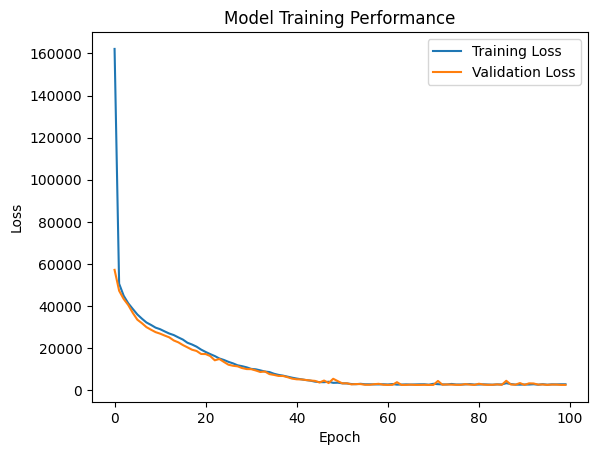

In [67]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Training Performance' )
plt.legend()
plt.show()

In [75]:
predictions = model.predict(X_test)
predictions

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


array([[ 447.1736 ],
       [ 668.30786],
       [1081.6487 ],
       [ 671.532  ],
       [ 811.9108 ],
       [1000.22516],
       [ 316.72998],
       [ 604.9001 ],
       [ 463.8949 ],
       [ 812.68195],
       [ 606.58575],
       [ 690.59766],
       [ 637.1409 ],
       [ 755.4123 ],
       [ 861.2983 ],
       [ 690.475  ],
       [ 960.0129 ],
       [ 473.1558 ],
       [ 583.5671 ],
       [ 366.6005 ],
       [ 807.4393 ],
       [ 810.9614 ],
       [ 368.8431 ],
       [ 824.25397],
       [1016.295  ],
       [ 603.2761 ],
       [ 674.3203 ],
       [ 977.2656 ],
       [ 649.72394],
       [ 645.61707],
       [ 698.52496],
       [ 817.4598 ],
       [ 833.9202 ],
       [ 803.55634],
       [ 473.28375],
       [ 722.3963 ],
       [ 730.57684],
       [1018.34467],
       [ 203.0055 ],
       [ 669.3449 ],
       [ 932.3773 ],
       [ 897.336  ],
       [ 797.8842 ],
       [ 764.6425 ],
       [ 593.6097 ],
       [ 844.42267],
       [ 615.01166],
       [ 570.

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


<ipython-input-76-1856574021c3>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test, label='Actual Yield')
<ipython-input-76-1856574021c3>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, label='Predicted Yield')


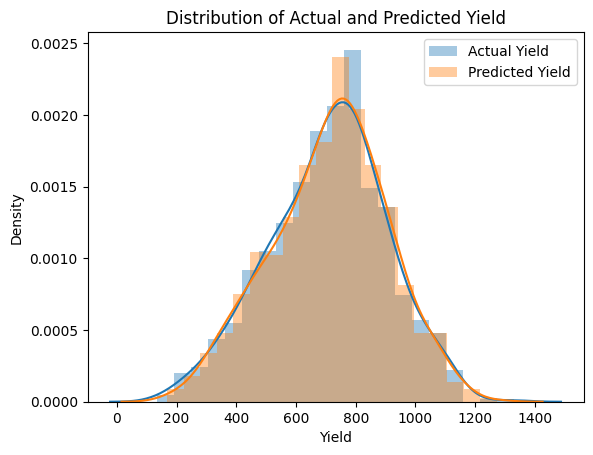

In [76]:
import seaborn as sns
y_pred=model.predict(X_test)
sns.distplot(y_test, label='Actual Yield')
sns.distplot(y_pred, label='Predicted Yield')
plt.xlabel("Yield")
plt.ylabel("Density")
plt.title("Distribution of Actual and Predicted Yield")
plt.legend()
plt.show()

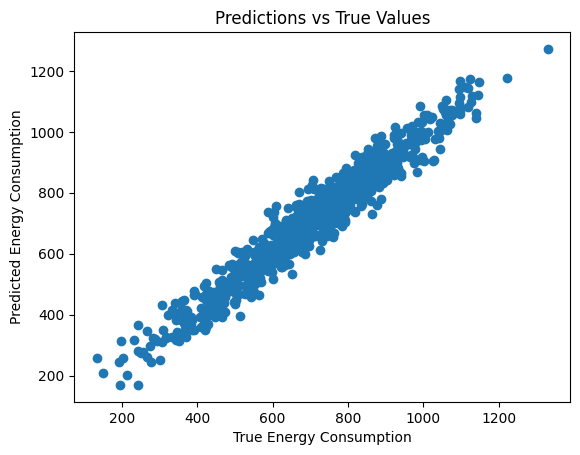

In [77]:
plt.scatter(y_test, y_pred)
plt.xlabel("True Energy Consumption")
plt.ylabel("Predicted Energy Consumption")
plt.title("Predictions vs True Values")
plt.show()